# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd # импортируем библиотеку pandas
import matplotlib.pyplot as plt  
import matplotlib # импортируем библиотеку matplotlib
import seaborn  # импортируем библиотеку seaborn

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # читаем csv-файл

In [3]:
pd.set_option('max_columns', None) # условие для отображения всх столбцов датафрэйма
data.head(10) # покажем первые 10 строчек датафрейма data.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# получение общей информации о данных из датафрейма data
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

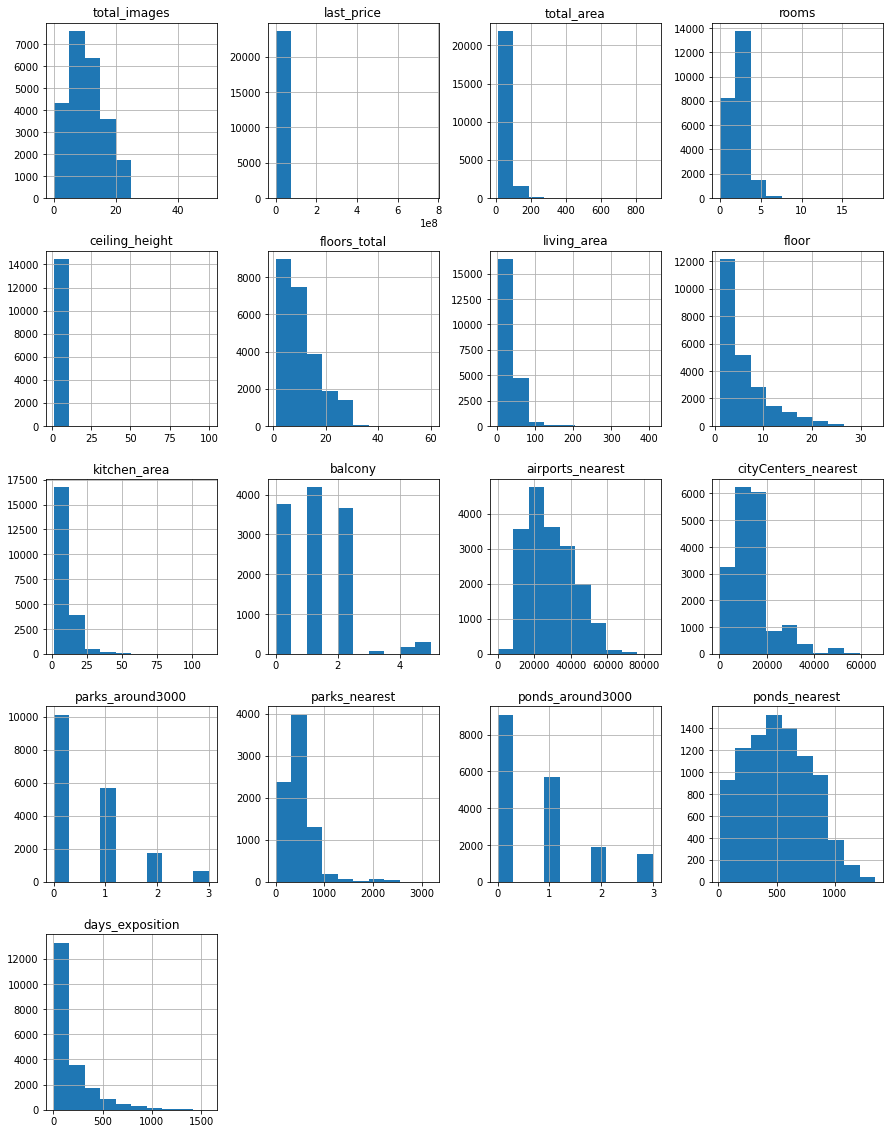

In [5]:
data.hist(figsize=(15, 20)) # Построим гистограммы по всем столбцам датафрэйма на одном графике.

## Выполните предобработку данных

 #### Выведим количество пропущенных значений для каждого столбца, используя комбинацию двух методов.

In [6]:
# подсчёт пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах есть пропущенные значения. Заполним пропущенные значения там, где это возможно. 
  * Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. 
  * Так же, если продавец не указал, что его квартира - аппартаменты, то скорее всего это квартира. Принимаем такое допущение, так как аппартаменты всречаются гораздо реже квартир. Такие пропуски заменим на False.

In [7]:
# замена пропусков в столбце 'balcony' на 0
data['balcony'] = data['balcony'].fillna(0)
# замена пропусков в столбце 'is_apartment' на значение False
data['is_apartment'] = data['is_apartment'].fillna(False)

#### Проанализируем пропуски в столбце `living_area`.

В данных о жилой площади есть пропуски и их достаточно большое количество, чтобы просто удалить. Расчитаем медиану отношения жилой площади к общей площади. Для заполнения пропусков умножим общую площадь на этот коэффициент.

In [8]:
# расчитаем коэффициент отношения жилой площади к общей площади. 
living_ratio = round(data['living_area'].median()/data['total_area'].median(),2)
living_ratio

0.58

In [9]:
# заменим пропуски в living_area на значения в столбце 'total_area'умноженные на медианное значение.
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
# проверим пропуски в столбце living_area
data['living_area'].isna().sum()

0

#### Проанализируем пропуски в столбце `kitchen_area`.

В данных о  площади кухни есть пропуски и их достаточно большое количество, чтобы просто удалить. Расчитаем медиану отношения площади кухни к общей площади. Для заполнения пропусков умножим общую площадь на этот коэффициент.

In [10]:
# расчитаем коэффициент отношения площади кухни к общей площади. 
kitchen_ratio = round(data['kitchen_area'].median()/data['total_area'].median(),2)
kitchen_ratio

0.18

In [11]:
# заменим пропуски в kitchen_area на значения в столбце 'total_area' умноженные на медианное значение.
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)
# проверка пропусков в столбце kitchen_area
data['kitchen_area'].isna().sum()

0

#### Проведем общую проверку на соотношение жилой площади, площади кухни и общей площади.

Логично предположить, что сумма жилой площади и площади кухни не может превышать общую площадь квартиры. Так же существуют коридоры и санузлы, оставим на них 8% общей площади. Проведем проверку.

In [12]:
len(data.query('total_area*0.92 <=(living_area + kitchen_area)'))

496

496 квартир не отвечают нашему условию, эти объявления заполнены некорректно. Удалим эти строки из выборки.

In [13]:
data = data.query('total_area*0.92 >= (living_area + kitchen_area)')

#### Рассмотрим пропуски в столбце `ceiling_height`.

В данных о высоте потолков более 9 тысяч пропущенных значений. Заполним пропуски в столбце ceiling_heigh медианными значениями. Это кажется разумным, так как разброс возможных значений не велик.

In [14]:
# заполним пропуски в ceiling_height медианой.
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
# проверка пропусков в столбце ceiling_height
data['ceiling_height'].isna().sum()

0

#### Удалим строки с пропущенными значениями.

Так как для дальнейшего анализа, нужны значения из столбцов `floors_total` и `locality_name`. А пропущенных значений менее 0,4%, то эти строки можно удалить без потери важной информации.

In [15]:
# удаление строк, в которых в столбцах floors_total или locality_name встречается NaN
data = data.dropna(subset=['floors_total', 'locality_name'])

#### Посмотрим количество пропусков после обработки.

In [16]:
# подсчёт пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5378
cityCenters_nearest      5355
parks_around3000         5354
parks_nearest           15208
ponds_around3000         5354
ponds_nearest           14233
days_exposition          3101
dtype: int64

 <div style="background-color:lavender; color:#black; text-align:left; padding:2%">
- Остались пропущенные значения в данных полученных со спутника. Корректно расчитать или получить эти данные в рамках нашего исследования затруднительно. Поэтому эти пропуски оставим без изменений.

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
- `days_exposition` Этот параметр показывает, сколько дней было размещено каждое объявление. Пропуски в данных возможны потому, что на момент выгрузки датафрэйма объявления еще не были сняты с сайта. У нас нет информации о дате выгрузки датафрэйма, поэтому корректно оценить сколько времени объявление было на сайте, затруднительно. Пропуски игнорируем, так как оставшийся объем данных достаточен для анализа.

#### Заменим тип данных object в столбце `is_apartment` на булев `bool` с помощью метода `astype()`.

Так как уникальные значения в этом столбце False и True, то это логический тип данных bool.

In [17]:
# замена типа данных на булев в столбце 'is_apartment'
data['is_apartment'] = data['is_apartment'].astype('bool')

#### Замените вещественный тип данных в столбце `floors_total` на целочисленный с помощью метода `astype()`.

Так как уникальные значения в этом столбце целочисленные, то это тип данных int.

In [18]:
# заменим вещественые числа на целочисленные в столбце 'floors_total'
data['floors_total'] = data['floors_total'].astype('int')

#### Изменим тип данных object в столбце first_day_exposition на формат даты.

In [19]:
# замена типа данных на формат даты.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Выведите на экран перечень уникальных названий из столбца `locality_name`  и их количество.

In [20]:
print('Количество уникальных значений: ', len(data['locality_name'].unique()))
print('Уникальные значения: ', data['locality_name'].unique())

Количество уникальных значений:  363
Уникальные значения:  ['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Н

In [21]:
# заменим неявные дубликаты в столбце 'locality_name'
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа ', 'поселок ', 'деревня ', 'село ',
              'городской поселок ', 'городской ', 'поселок городского типа имени ', 'садовое товарищество ',
              'садоводческое некоммерческое товарищество ', 'коттеджный поселок ',
              'коттеджный ', 'при железнодорожной станции ', 'станции ', 'имени '], '', regex=True)
)
# проверим удаление неявных дубликатов
print('Количество уникальных значений, после замены: ', len(data['locality_name'].unique()))

Количество уникальных значений, после замены:  304


## Добавьте в таблицу новые столбцы

#### Добавим в таблицу столбец `price_per_sqm` цена одного квадратного метра. Поделим стоимость объекта на его общую площадь, а затем округлим до двух знаков после запятой.

In [22]:
# добавляем столбец цена за квадратный метр и округлим до двух десятичных знаков.
data['price_per_sqm'] = round(data['last_price']/data['total_area'], 2)

#### Добавим в таблицу столбец  `weekday`  с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее).

In [23]:
# добавляем столбец день недели
data['weekday'] = data['first_day_exposition'].dt.weekday

#### Добавим в таблицу столбец  `month`  месяц публикации объявления.

In [24]:
# используем класс DatetimeIndex и применим к нему атрибут month
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

#### Добавим в таблицу столбец  `year`  год публикации объявления.

In [ ]:
# используем класс DatetimeIndex и применим к нему атрибут year
# добавляем столбец с годом 
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

#### Добавим в таблицу столбец `floor_type`  тип этажа квартиры (значения — «первый», «последний», «другой»).

Используем функцию, которая возвращает тип этажа по значению этажа floor и всего этажей в доме , используя правила:
- 'первый' при значении floor = 1;
- 'последний' при значении floor == floors_total, т.е. этаж равен последнему этажу в здании;
- 'другой' в остальных случаях.

In [26]:
# используем функцию 
def type_floor(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        return 'другой'
    except:
        pass
    
data['floor_type'] = data.apply(type_floor, axis=1)
data['floor_type'].value_counts()

другой       16995
последний     3248
первый        2830
Name: floor_type, dtype: int64

#### Добавим в таблицу столбец `cityCenters_nearest_km` 

Отобразим в этом столбце расстояние до центра города в километрах.  Переведем метры в километры и округлим до ближайших целых значений.

In [27]:
# добавляем столбец cityCenters_nearest_km
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000, 0)

#### Проверим результаты обработки данных, посмотрим на обновленный датафрэйм.

In [28]:
data.head(10) # покажем первые 10 строчек обновленного датафрейма.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600,1,False,False,False,11.00,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,92.220,9,False,False,False,28.62,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400,5,False,False,False,9.10,0.0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600,6,False,False,False,14.40,1.0,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,41.528,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430,26,False,False,False,8.81,0.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0


## Проведите исследовательский анализ данных

### Изучим параметры объектов и построим отдельные гистограммы для каждого из этих параметров.

#### Исследуем на наличие аномальных значений данные об общей площади квартиры `total_area`.

Построим гистограмму по столбцу 'total_area' и описательную статистику. Проанализируем аномальные значения. 

count    23073.000000
mean        60.356519
std         35.530901
min         13.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

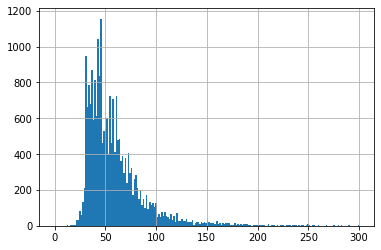

In [29]:
data['total_area'].hist(bins=200, range=(0,300)) # строим гистограмму
data['total_area'].describe() # смотрим описательную статистику

Квартиры общей площадью 150 кв.м. — уже редки. На участке более 250 кв.м. гистограмма сливается с нулём (это не значит, что там ровно 0, но таких квартир единицы). Примем верхнюю границу в 200 кв.м. Это число кажется разумным: больше квартир мало. Если отбросить значения больше 200, потеряется не более 1,0% данных. Да и редко встречаются квартиры площадью больше 200 кв.м.

Так же исключим из анализа очень маленькие квартиры, общей площадью менее 17 кв.м. Таких квартир всего 10 шт, и на итоговые результаты их исключение не повлияет, при этом расчет среднего или медианы, будет более корректным.

Решено. Продолжаем работать с наблюдениями, удовлетворяющими условию: data.query('17 <=total_area <= 200').

In [30]:
data = data.query('17 <=total_area <= 200') # обновим датафрэйм data

#### Жилая площадь  исследуем на наличие аномальных значений `living_area`.

Построим гистограмму по столбцу 'living_area' посмотрим описательную статистику. Проанализируем аномальные значения

count    22849.000000
mean        33.175048
std         17.080077
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        150.800000
Name: living_area, dtype: float64

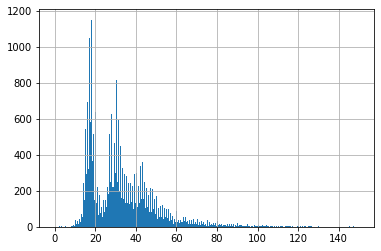

In [31]:
data['living_area'].hist(bins=300, range=(0,150)) # строим гистограмму
data['living_area'].describe() # смотрим описательную статистику

На участке более 120 кв.м. гистограмма сливается с нулём, таких квартир единицы.
Примем верхнюю границу в 120 кв.м. Если отбросить значения больше 120, потеряется не более 1,0% данных. Да и редко встречаются квартиры с такой жилой площадью, более 200 кв.м.
Так же исключим из анализа квартиры с жилой площадью менее 10 кв.м. Таких квартир всего 23 шт, и на итоговые результаты их исключение не повлияет, при этом расчет среднего или медианы, будет более корректным.
Продолжаем работать с наблюдениями, удовлетворяющими условию: data.query('9 <=living_area <= 120').

In [32]:
data = data.query('9 <=living_area <= 120') # обновим датафрэйм data

#### Площадь кухни  исследуем на наличие аномальных значений `kitchen_area`.

Построим гистограмму по столбцу 'kitchen_area' посмотрим описательную статистику. Проанализируем аномальные значения

count    22793.000000
mean        10.220107
std          5.137636
min          1.300000
25%          7.000000
50%          9.000000
75%         11.700000
max         93.200000
Name: kitchen_area, dtype: float64


30

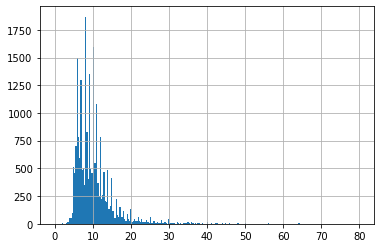

In [33]:
data['kitchen_area'].hist(bins=250, range=(0,80)) # строим гистограмму
print(data['kitchen_area'].describe()) # смотрим описательную статистику
len(data.query('kitchen_area >= 50')) 

   На участке гистограммы более 50 кв.м. гистограмма сливается с нулём, таких квартир единицы. Это логично, так как редко бывают кухни более 50 кв.м. Примем верхнюю границу в 50 кв.м. 
   Продолжаем работать с наблюдениями, удовлетворяющими условию: data.query('kitchen_area <= 50'). 

In [34]:
# обновим датафрэйм data
data = data.query('kitchen_area <= 50')

#### Исследуем данные на наличие аномальных значений по цене объекта `last_price`.

Построим диаграмму размаха по столбцу  `last_price` и гистограмму. Проанализируем аномальные значения.

count    2.277000e+04
mean     5.939001e+06
std      5.916755e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.646750e+06
max      3.300000e+08
Name: last_price, dtype: float64


161

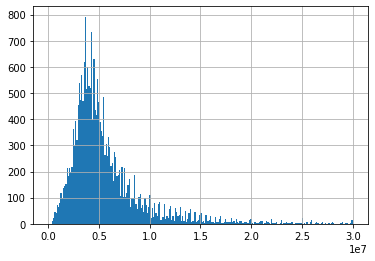

In [35]:
data['last_price'].hist(bins=250, range=(0,30000000))  # строим гистограмму
print(data['last_price'].describe())  # смотрим описательную статистику
len(data.query('last_price >= 30000000'))

<AxesSubplot:>

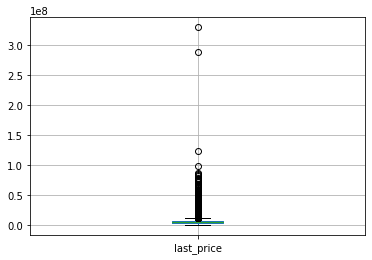

In [36]:
data.boxplot('last_price')

 На графике видны явные выбросы со стоимостью недвижимости более 30 млн рублей. Таких объявлений 161, они сильно искажают статистистические параметры. Примем верхнюю границу в 30 млн. руб.

In [37]:
# обновим датафрэйм data
data = data.query('last_price < 30000000')
len(data)

22609

####  Исследуем данные на наличие аномальных значений по количеству комнат `rooms`.

Построим гистограмму по столбцу 'rooms' посмотрим описательную статистику. Проанализируем аномальные значения

count    22609.000000
mean         2.021363
std          0.968604
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64


14

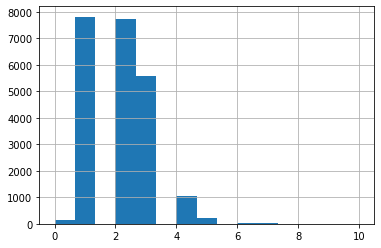

In [38]:
data['rooms'].hist(bins=15, range=(0,10))  # строим гистограмму
print(data['rooms'].describe()) # смотрим описательную статистику
len(data.query('rooms >= 7'))

На участке гистограммы более 7 комнат, встречаются единичные данные. Это логично, так как редко встречаются семикомнатные квартиры и более. Таких квартир в выборке всего 14. Примем верхнюю границу в 7 комнат. Продолжим работать с наблюдениями, удовлетворяющими условию: data.query('rooms <= 7'). 

In [39]:
data = data.query('rooms <= 7')  # обновим датафрэйм data

####  Заменим неявные дубликаты в столбце `ceiling_height`.

Обработаем неявные дубликаты в столбце  ceiling_height. 

In [40]:
print('Количество уникальных значений, до замены: ', len(data['ceiling_height'].unique()))
# посмотрим уникальные значения в столбце 'ceiling_height'
data['ceiling_height'].unique()

Количество уникальных значений, до замены:  164


array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.61,  3.2 ,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.3 ,  2.71,  4.  ,  2.47,  2.73,
        2.84,  3.1 ,  2.34,  3.4 ,  3.5 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76, 25.  ,  2.58,  2.52,  2.87,  2.66,  2.59,  2.  ,
        2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,  3.62,
        3.12,  2.53,  2.74,  2.96,  5.  ,  2.79,  2.95,  4.06,  2.94,
        3.7 ,  3.54,  3.53,  2.83,  2.4 ,  3.38,  3.01,  3.65,  3.18,
        3.35,  2.3 ,  2.48,  2.62,  3.57,  2.82,  3.98,  2.63,  3.83,
        3.52,  3.75,  2.88,  3.67,  3.66,  4.19,  3.95,  3.24,  4.8 ,
        4.5 ,  4.2 ,  3.36, 32.  ,  3.68,  3.07,  3.37,  3.09,  8.  ,
        3.16,  3.26,  3.34,  2.81,  3.44,  2.97,  4.37,  3.9 ,  3.27,
       27.  ,  4.1 ,  2.68,  2.93,  3.46, 24.  ,  3.47,  3.33,  3.63,
        3.14,  3.32, 26.  ,  1.2 ,  8.3 ,  2.86,  3.08,  3.17,  3.28,
        3.04,  3.84,

In [41]:
# замена неявных дубликатов в столбце 'ceiling_height'
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] = \
data.loc[data['ceiling_height'] >= 24, 'ceiling_height']/10

In [42]:
# посмотрим уникальные значения в столбце 'ceiling_height' после замены
print('Количество уникальных значений, после замены: ', len(data['ceiling_height'].unique()))

Количество уникальных значений, после замены:  159


Построим гистограмму по столбцу 'ceiling_height' посмотрим описательную статистику. Проанализируем аномальные значения.

In [43]:
# смотрим описательную статистику
print(data['ceiling_height'].describe())

count    22607.00000
mean         2.69106
std          0.29164
min          1.00000
25%          2.60000
50%          2.65000
75%          2.70000
max         22.60000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

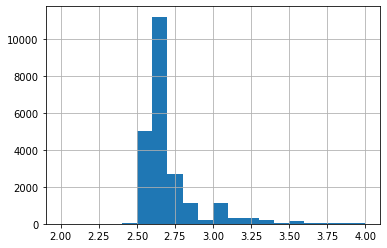

In [44]:
data['ceiling_height'].hist(bins=20, range=(2, 4))  # строим гистограмму

In [45]:
# посмотрим количество объявдений удовлетворяющих условию
print('Количество объявлений с высотой потолка ниже 2.4м: ', len(data.query('ceiling_height <= 2.4')))
print('Количество объявлений с высотой потолка выше 4м: ', len(data.query('ceiling_height >= 4')))

Количество объявлений с высотой потолка ниже 2.4м:  40
Количество объявлений с высотой потолка выше 4м:  63


 Очевидно, что потолки в квартире не могут ниже 2 метров, это явно аномальные значения. Так же потолки ниже 2.4 метра тоже вызывают сомнения. Таких квартир всего 40, и удаление строк на расчеты не повлияет. Нижняя граница 2.4 метра.
 
 На участке гистограммы более 4 метров, встречаются единичные данные. Это логично, так как редко встречаются квартиры с такими высоки потолками. Таких квартир в выборке всего 63. Примем верхнюю границу в 4 метра. 
 
 Продолжим работать с наблюдениями, удовлетворяющими условию: data.query('2.4 <= ceiling_height <= 4'). 

In [46]:
# обновим датафрэйм data
data = data.query('2.4 <= ceiling_height <= 4')

In [47]:
print(data['ceiling_height'].describe())

count    22553.000000
mean         2.686139
std          0.192320
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64


#### Исследуем данные на наличие аномальных значений по общему количеству этажей в доме `floors_total`.

Построим гистограмму по столбцу 'floors_total' посмотрим описательную статистику. Проанализируем аномальные значения

<AxesSubplot:>

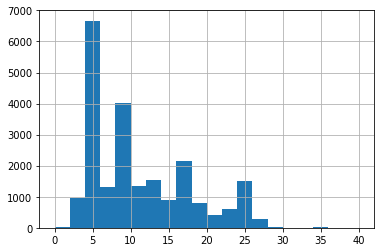

In [48]:
# строим гистограмму
data['floors_total'].hist(bins=20, range=(0,40))

In [49]:
# смотрим описательную статистику
print(data['floors_total'].describe())

count    22553.000000
mean        10.741631
std          6.601795
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [50]:
# посмотрим количество объявдений удовлетворяющих условию
print('Объявления с общим количеством этажей больше 30: ', len(data.query('floors_total >= 30')))

Объявления с общим количеством этажей больше 30:  30


На диаграмме размаха и гистограмме четко видно, что многоквартирных домов с общим количеством этажей более 30, всего 30. Это явно выбросы.

In [51]:
data = data.query('floors_total <= 30') # обновим датафрэйм data

#### Исследуем данные на наличие аномальных значений по расстоянию до центра `cityCenters_nearest`.

Построим гистограмму по столбцу 'cityCenters_nearest' посмотрим описательную статистику. Проанализируем аномальные значения

<AxesSubplot:>

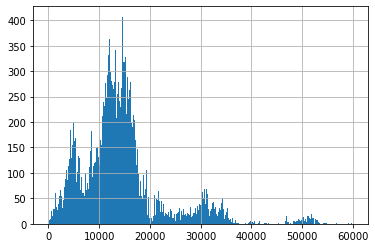

In [52]:
data['cityCenters_nearest'].hist(bins=300, range=(0,60000)) # строим гистограмму

In [53]:
print(data['cityCenters_nearest'].describe()) # смотрим описательную статистику

count    17199.000000
mean     14447.009826
std       8592.832579
min        208.000000
25%       9720.000000
50%      13242.000000
75%      16414.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


In [54]:
# посмотрим количество объявдений удовлетворяющих условию
print('Объявления с расстоянием от центра более 37000м: ', len(data.query('cityCenters_nearest >= 37000')))

Объявления с расстоянием от центра более 37000м:  312


 На участке более 37000м на гистограмме есть небольшой пик, но таких объявлений всего 312. При этом они значительно влияют на величину среднего и медианы. 

 Примем верхнюю границу в 37000м. Это число кажется разумным: больше квартир мало. 

 Продолжаем работать с наблюдениями, удовлетворяющими условию: data.query('cityCenters_nearest <= 37000').

In [55]:
# обновим датафрэйм data
data = data.query('cityCenters_nearest <= 37000 or cityCenters_nearest.isna()')
len(data)

22211

В данных о расстоянии до центра города есть пропуски, оставим данные без изменения. Так как замена на медиану или среднее в этом случае не корректна и ошибочка. Расстояние можно заполнить медианными значениями по населенном пунктам, но по мелким поселкам и деревням, таких данных нет. Так же если пропуски заполнить медианой по санкт-Петербургу, это будет грубой ошибкой, так как город огромный и расстояния у всех объектов различные. Поэтому пропуски оставляем без изменений.

#### Исследуем данные на наличие аномальных значений по расстоянию до ближайшего парка `parks_nearest`.

Построим гистограмму по столбцу 'parks_nearest' посмотрим описательную статистику. Проанализируем аномальные значения

<AxesSubplot:>

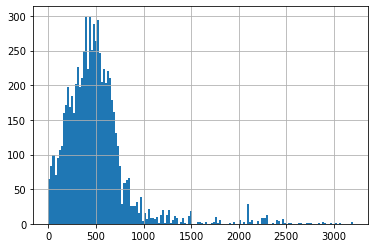

In [56]:
data['parks_nearest'].hist(bins=150, range=(0,3200)) # строим гистограмму

In [57]:
print(data['parks_nearest'].describe()) # смотрим описательную статистику

count    7392.000000
mean      495.898404
std       342.427705
min         1.000000
25%       293.750000
50%       458.000000
75%       617.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [ ]:
# посмотрим количество объявдений удовлетворяющих условию
print('Объявления с расстоянием до ближайшего парка более 1200м: ', len(data.query('parks_nearest >= 1200')))

 На участке более 1200м на гистограмме есть одиночные значения, но таких объявлений всего 253. Примем верхнюю границу в 1200м.
 
 Пропуски оставим без изменений, так как получить или расчитать эти данные нельзя. Дальнейший анализ проведем по доступным данным.

In [59]:
# обновим датафрэйм data
data = data.query('parks_nearest <= 1200 or parks_nearest.isna()')
len(data)

21960

### Изучим, как быстро продавались квартиры по данным `days_exposition`.

<AxesSubplot:>

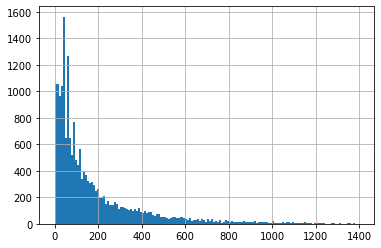

In [60]:
data['days_exposition'].hist(bins=150, range=(0,1400)) # построим гистограмму

Диаграмма реалистична, так как похожа на распределение Пуассона, которое описывает время продажи, стояния в очередях и других подобных событий. На графиках видно, что чаще квартиры продаются до года. Но так, как в выборке есть данные об очень долгих продажах, то значения среднего и медианы исскажены в большую сторону. 

На гистограмме виден пик в районе 50 дней, скорее всего большое число объявлений было закрыто за этот срок.

На участке более 800 дней, гистограмма начинает стремится к нулю. Нетипично долгие продажи признаем выбросами и отбросим. Их не так много. И скорее всего такие продажи не типичны. Например в таких объявлениях может быть завышена цена или владелец забыл снять объявление, или с данным объектом есть какие-либо проблемы. Раз это не типичные продажи, значит в рамках нашего исследования такие объявления не интересны.

Для более точной оценки верхней границы построим диаграмму размаха.

count    19055.000000
mean       177.820415
std        216.000465
min          1.000000
25%         45.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64


1571

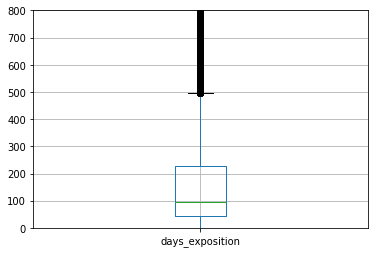

In [61]:
# строим диаграмму размаха.
plt.ylim(0, 800)
data.boxplot('days_exposition')

# смотрим описательную статистику
print(data['days_exposition'].describe())

# сколько значиний отбросим, если примем верхнюю границу в 500 дней
len(data.query('days_exposition>=500'))

Определим верхнюю границу в 500 дней. Продажи до полутора лет, кажется разумной границей для нашего исследвания.

Продолжаем работать с наблюдениями, удовлетворяющими условию: data.query('days_exposition <= 500').

In [62]:
# обновим датафрэйм data
good_data = data.query('days_exposition <= 500')
len(good_data)

17488

В дальнейшем исследовании будем опираться на 17,5 тыс. данных, это достаточная статистика для анализа.

In [63]:
print(good_data['days_exposition'].describe()) # расчитаем среднее и медиану
print('Чаще всего продажи были в течении дней: ', good_data['days_exposition'].mode())

count    17488.000000
mean       126.172347
std        118.676767
min          1.000000
25%         41.000000
50%         83.000000
75%        180.000000
max        500.000000
Name: days_exposition, dtype: float64
Чаще всего продажи были в течении дней:  0    45.0
dtype: float64


 Подведем итоги. Было решено отбросить слишком долгие продажи (более 500 дней), для надежности вместо среднего арифметического расчитали медиану. Тогда эти продажи не искажают оценку типичной продолжительности продажи.
 
 Чаще всего продажа закрывалась за 45 дней. 
 
 Половина всех продаж была закрыта в течении 2,8 месяцев (83 дня). Продажи более полугода, можно считать необычно долгими.

### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта `last_price`.

#### Изучим, зависит ли цена от общей площади.

Коэффициент корреляции:  0.782068855497343


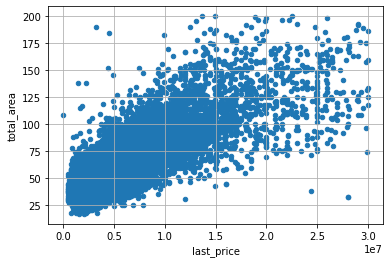

In [64]:
data.plot(x='last_price', y='total_area', kind='scatter', grid=True)
print('Коэффициент корреляции: ', data['last_price'].corr(data['total_area']))

 На графике видна прямая зависимость стоимости жилья, от общей площади, чем больше площадь, тем выше стоимость. На участке от 15 до 120 квадратов, связь более сильная, это и понятно небольшие квартиры обычно эконом или комфорт класса, цены на такие квартиры более предсказуемы. 
 
 На участке выше 100 квадратов, разброс сильнее и связь слабее. Это может объясняться тем, что с таким метражом появляется больше квартир бизнес и премиум класса, в этом сегменте цены более разнообразны.
 
 Так же сильную взаимосвязь подтверждает высокий коэффициент корреляции равный 0,78.


#### Изучим, зависит ли цена от площади кухни.

Коэффициент корреляции:  0.6159110275693733


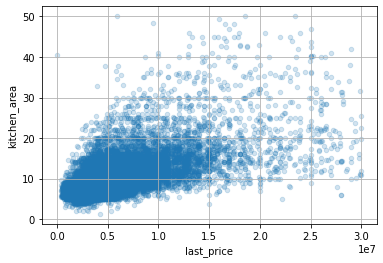

In [65]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2, grid=True)
print('Коэффициент корреляции: ', data['last_price'].corr(data['kitchen_area']))

 Зависимость стоимости квартиры от площади кухни не сильная меньше, чем от общей площади квартиры, это подтверждает коэфициент корреляции равный 0,62.
 
 В любом случае связь носит прямой характер, чем больше площадь кухни, тем выше стоимость. Но далеко не во всех случаях. Наиболее выраженная зависимоть на участке от 4 до 15 кв.м. с ростом площади, растет и стоимость квартиры.


#### Изучим, зависит ли цена от жилой площади.

Коэффициент корреляции:  0.6772066648306969


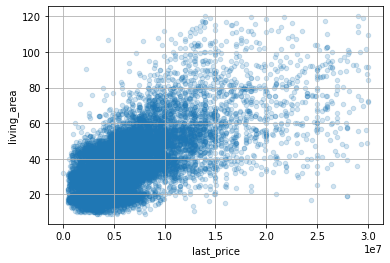

In [66]:
# построим график
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.2, grid=True)
print('Коэффициент корреляции: ', data['last_price'].corr(data['living_area']))

 Зависимость цены квартиры от жилой площади выше, чем от площади кухни, это подтверждает коэфициент корреляции равный 0,68.
 
 На графике видна более сильная связь на участке от 10 до 50 квадратов, чем больше площадь, тем выше стоимость. Дальше эта зависимость ослабевает. 

#### Изучим, зависит ли цена от количества комнат.

       last_price
rooms            
0       2750000.0
1       3600000.0
2       4750000.0
3       6100000.0
4       8500000.0
5      11500000.0
6      12990000.0
7      16425000.0


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

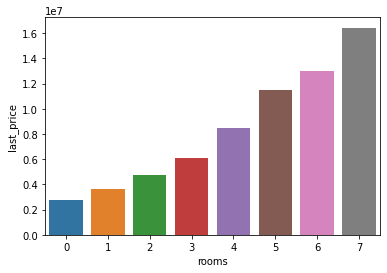

In [67]:
# вызовем функцию barplot()
data_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
print(data_rooms)
seaborn.barplot(x=data_rooms.index, y=data_rooms['last_price']) 

 На графике связь очевидна. Чем больше количество комнат в квартире, тем выше медиана стоимости квартиры. 

#### Изучим, зависит ли цена от этажа, на котором расположенна квартира `floor_type`.

            last_price
floor_type            
другой       4795500.0
первый       3900000.0
последний    4200000.0


<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

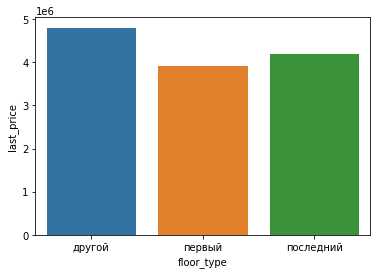

In [68]:
# вызываем функцию barplot()
data_floor = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
print(data_floor)
seaborn.barplot(x=data_floor.index, y=data_floor['last_price']) 

 На графике видна определенная зависимость. По самой низкой цене продают квартиры на первых этажам, так как они имеют ряд существенных минусов по сравнению с другими этажами, например риск взлома в них выше, чаще они холоднее других и тому подобное. 
 
 Цена квартир на последнем ниже, чем на остальных. 
 
 И самая высокая стоимость у квартир на остальных этажах.

#### Изучим, зависит ли цена от дня недели размещения объявления.

           last_price
weekday              
0        5.693114e+06
1        5.613860e+06
2        5.699263e+06
3        5.729664e+06
4        5.529570e+06
5        5.423925e+06
6        5.436428e+06


<AxesSubplot:xlabel='weekday', ylabel='last_price'>

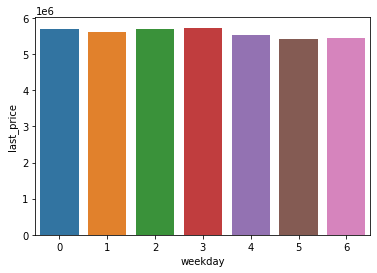

In [69]:
# вызываем функцию barplot()
data_weekday = data.pivot_table(index='weekday', values='last_price')
print(data_weekday)
seaborn.barplot(x=data_weekday.index, y=data_weekday['last_price']) 

 На графике высокой взаимосвязи не наблюдается. В рабочие дни недели с понедельника по четверг цена немного выше, по сравнению с пятницей и выходными. Но эта разница не значительна. 

#### Изучим, зависит ли цена от месяца размещения объявления.

       last_price
month            
1       4510000.0
2       4600000.0
3       4600000.0
4       4750000.0
5       4500000.0
6       4335000.0
7       4562500.0
8       4500000.0
9       4650000.0
10      4526000.0
11      4650000.0
12      4641000.0


<AxesSubplot:xlabel='month', ylabel='last_price'>

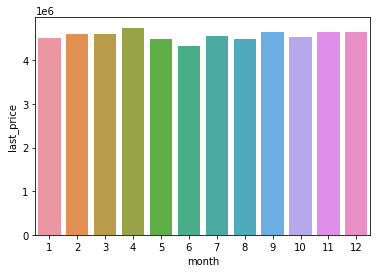

In [70]:
# вызываем функцию barplot()
data_month = data.pivot_table(index='month', values='last_price', aggfunc='median')
print(data_month)
seaborn.barplot(x=data_month.index, y=data_month['last_price']) 

 На графике можно наблюдать определенную сезонную зависимость цены квартир от месяца размещения объявления. 
 
 Снижение цены видно с мая по август. Это объясняется тем, что летом обычно совершается меньше сделок с недвижимостью, так как много людей уезжают в отпуска.  Спрос на квартиры падает и их продают по более низким ценам. 
 
 Так же цены ниже среднего в январе и октябре, что можно объяснить снижением спроса в этоти месяцы.
 
 В месяцы спада половина цен ниже 4,57 млн.руб. в остальные месяцы выше 4,6 млн.руб.

#### Изучим, зависит ли цена от года размещения объявления.

      last_price
year            
2014   7282500.0
2015   5100000.0
2016   4490000.0
2017   4467500.0
2018   4520000.0
2019   5000000.0


<AxesSubplot:xlabel='year', ylabel='last_price'>

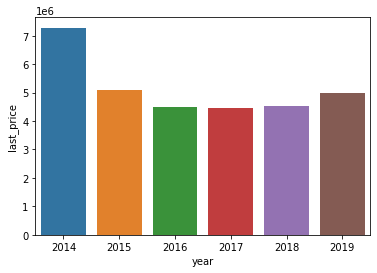

In [71]:
# вызываем функцию barplot()
data_year = data.pivot_table(index='year', values='last_price', aggfunc='median')
print(data_year)
seaborn.barplot(x=data_year.index, y=data_year['last_price']) 

 На графике хорошо видно, что в 2014-м был пик и самые высокие цены на квартиры, после чего в 2015 стоимость квартир резко упала и продолжала снижаться до 2017 года. В 2018 начался медленный рост, но до уровня 2014 года цены так и не вырасли.

### Найдем населенные пункты с самой высокой и низкой стоимостью квадратного метра.

  Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Для большей наглядности построим график `barplot`.

                      mean  count
locality_name                    
Санкт-Петербург  109906.92  14585
Мурино            85579.21    557
Кудрово           94987.98    454
Шушары            78366.18    433
Всеволожск        68536.46    383
Пушкин           102794.21    355
Парголово         90225.66    324
Колпино           75353.19    320
Гатчина           68632.55    302
Выборг            58444.78    227


<AxesSubplot:xlabel='mean', ylabel='locality_name'>

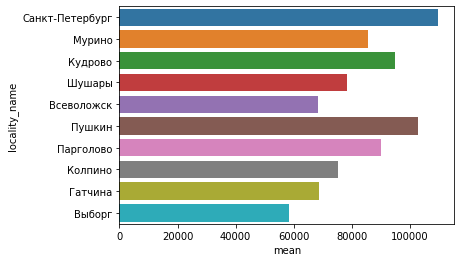

In [72]:
# считаем данные по отдельным населенным пунктам
big_data = data.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['mean','count'])
big_data.columns = ['mean', 'count']
big_data['mean'] = round(big_data['mean'], 2)

# выберем первые 10 населенных пунктов с наибольшим числом объявлений
big_data = big_data.sort_values(by='count', ascending=False).head(10)
print(big_data)

# вызываем функцию barplot()
seaborn.barplot(x=big_data['mean'], y=big_data.index)

 - Как и следовало ожидать наибольшая стоимость за квадратный метр в Санкт-Петербурге и составляет 112 тыс. за один квадратный метр. Следующие населенные пункты в топе по стоимости за квадратный метр город Пушкин и деревня Кудрово. 
 - В Пушкине такая высокая цена, обясняется тем, что это престижный пригород Санкт-Петербурга с музеями, парками и всемирноизвестными достопримечательностями.
 - Высокие цены в деревни Кудрово, можно объяснить близостью к Дыбенко, хорошо развитому району Санкт-Петербурга. Из плюсов здесь можно выделить близость к кольцевой автодороге и станции метро, так же рядом располагаются крупный ТЦ Мега Дыбенко. Эта деревня является одним из самых ближних пригородов Санкт-Петербурга.
 - Самые низкие цены в Выборге, из-за удаленности от Санк-Петербурга (около 138 км). 

### Определим, как стоимость объектов зависит от расстояния до центра города. 

  Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим их среднюю стоимость на разном удалении от центра. Учитывая каждый километр расстояния: узнаем среднюю цену квартир в одном километре от центра, в двух и так далее. Опишем, как стоимость объектов зависит от расстояния до центра города — построим график изменения средней цены для каждого километра от центра Петербурга.

                          price_mean
cityCenters_nearest_km              
0.0                     9.981667e+06
1.0                     1.188857e+07
2.0                     1.046500e+07
3.0                     9.533110e+06
4.0                     1.010011e+07
5.0                     1.055313e+07
6.0                     9.404089e+06
7.0                     9.223514e+06
8.0                     8.617938e+06
9.0                     6.469657e+06
10.0                    6.308919e+06
11.0                    5.879083e+06
12.0                    5.779988e+06
13.0                    6.049590e+06
14.0                    5.581131e+06
15.0                    5.759074e+06
16.0                    5.300944e+06
17.0                    5.156516e+06
18.0                    4.833140e+06
19.0                    5.066903e+06
20.0                    4.611579e+06
21.0                    5.510752e+06
22.0                    5.404502e+06
23.0                    4.679963e+06
24.0                    3.890687e+06
2

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='price_mean'>

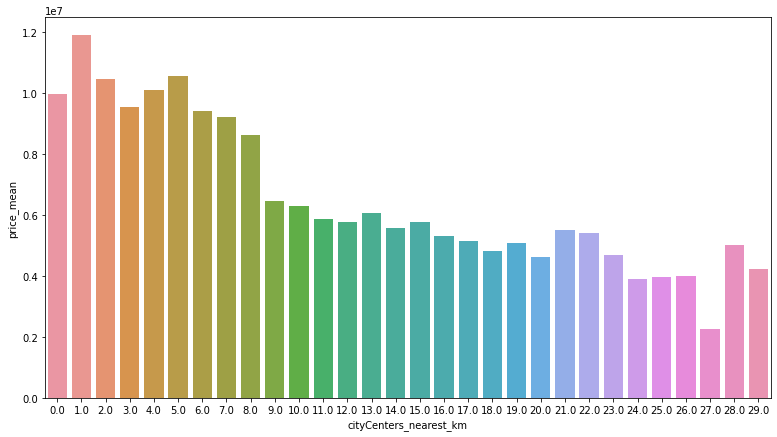

In [73]:
# считаем данные по удаленности от центра города
distance = (
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
)
distance.columns = ['price_mean']
print(distance)

matplotlib.rcParams['figure.figsize'] = [13, 7] # указываем размер графика
# вызываем функцию barplot()
seaborn.barplot(x=distance.index, y=distance['price_mean'])

 Самые высокие цены непосредственно в центре города, на расстоянии до 2 км от центра. 
 
 Следующий участок с наиболее высокими ценами на расстоянии от 3 до 8 км от центра. Неоднородность цен на этом участке, возможно это связанна с разным классов жилья в центральном районе города. Здесь могут соседствовать престижные районы как Крестовский остров и коммунальные квартиры в районе площади Восстания. Поэтому разброс цен неоднородный.
 
 С 9 км от центра города идет устойчивое снижение средней стоимости недвижимости.

## Напишите общий вывод

 Мы исследовали влияние различных факторов на итоговую стоимость объекта недвижимоти. 

### Факторы, которые больше всего влияют на стоимость квартиры.

1. В первую очередь на цену квартиры влияет общая площать квартиры, чем она больше, тем выше и цена (это подтверждает и высокий коэффициент корреляции равный 0,73). Особенно эта зависимость высока для квартир площадью от 15 до 100 квадратных метров.
2. В меньшей степени на цену оказывает влияние жилая площадь и площадь кухни. Прослеживается определенная связь цены и жилой площади от 10 до 50 квадратов, чем больше площадь, тем выше стоимость. Дальше эта зависимость ослабевает. Такая же прямая взаимосвязьс площадью кухни на участке от 4 до 15 кв.м.

3. Сильное влияние на цену оказывает количество комнат в квартире, чем их больше, тем и цена выше.

4. Квартиры расположенные на первом и последнем этажах, стоят меньше, чем квартиры не на крайних этажах. Самая низкая стоимость у квартир рассположенных на первом этаже.

5. Цена зависит от года размещения объявления, в 2014-м был пик и самые высокие цены на квартиры, после чего в 2015 стоимость квартир резко упала и продолжала снижаться до 2017 года. В 2018 начался медленный рост, но до уровня 2014 года цены так и не вырасли.

6. Зависимость цены от населенного пункта. Как и следовало ожидать наибольшая стоимость за квадратный метр в Санкт-Петербурге и составляет 112 тыс.кв.м. Следующие населенные пункты в топе по стоимости за квадратный метр город Пушкин и деревня Кудрово.
    - В Пушкине такая высокая цена, обясняется тем, что это пристижный пригород Санкт-Петербурга с музеями, парками и всемирноизвестными достопримечательностями.
    - Высокие цены в деревни Кудрово, можно объяснить близостью к Дыбенко, хорошо развитому району Санкт-Петербурга. Из плюсов здесь можно выделить близость к кольцевой автодороге и станции метро, так же рядом располагаются крупный ТЦ Мега Дыбенко. Эта деревня является одним из самых ближних пригородов Санкт-Петербурга.
    
   Самые низкие цены в Выборге, из-за удаленности от Санк-Петербурга (около 138 км).



7.  Зависимость цены от удаленности от центра города. Самые высокие цены в среднем непосредственно в центре города, на расстоянии до 2 км от центра и составляют от 10 до 12 млн.руб.

    Следующий участок с наиболее высокими ценами на расстоянии от 3 до 8 км от центра. Неоднородность цен на этом участке, возможно это связанна с разным классов жилья в центральном районе города. Здесь могут соседствовать престижные районы как Крестовский остров и коммунальные квартиры в районе площади Восстания. Поэтому разброс цен неоднородный. Цена начинается от 10 млн. и постепенно нижается до 8,6 млн. руб.

    С 9 км от центра города идет устойчивое снижение средней стоимости недвижимости до 2,5 млн.руб. 

    На расстоянии 28-29 км от центра, наблюдается рост стоимости до 5 млн.руб. Возможно на таком расстоянии находятся спальные районы города с хорошей инфраструктурой.


### Факторы, которые меньше влияют на стоимость квартиры.

1. Зависимость цены от даты размещения носит следующий характер:
- от дня недели цена практически не зависит.
- наблюдается слабая сезонная зависимость от даты размещения объявления, есть определенный спад в летнее время с мая по август, так же снижение цены наблюдается в октябре и январе. В месяцы спада половина цен ниже 4,57 млн.руб. в остальные месяцы выше 4,6 млн.руб.